# Response Time Statistics for the Police Districts

### Version 2: More realistic estimate of number of cars per district
Estimation in `preprocessing/45_estimate_nr_of_cars.ipynb`

This notebook inspect statistics of:
1) Single police districts
2) Within-district - differences between the cars
3) Between districts


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
import utilityModule # own custom functions

## Load data saved from the main analysis script

In [2]:
# Constants from analysis script - from step 5.1. in main analysis
car_capacity_dict = {
    "Oslo": 600,
    "East": 600,
    "SouthEast": 500,
    "Agder": 450,
    "SouthWest": 700,
    "West": 450,
    "MoreRomsdal": 600,
    "Inland": 320,
    "Trondelag": 450,
    "Nordland": 495,
    "Troms": 300,
    "Finnmark": 142}

# import car to events dataframes from CSV
car_to_events_df_Oslo = pd.read_csv("../data/Oslo/OsloCarToEventsAssignment_29.04.csv")
car_to_events_df_East = pd.read_csv("../data/East/EastCarToEventsAssignment_29.04.csv")
car_to_events_df_Inland = pd.read_csv("../data/Inland/InlandCarToEventsAssignment_29.04.csv")
car_to_events_df_SouthEast = pd.read_csv("../data/SouthEast/SouthEastCarToEventsAssignment_29.04.csv")
car_to_events_df_Agder = pd.read_csv("../data/Agder/AgderCarToEventsAssignment_29.04.csv")
car_to_events_df_SouthWest = pd.read_csv("../data/SouthWest/SouthWestCarToEventsAssignment_29.04.csv")
car_to_events_df_West = pd.read_csv("../data/West/WestCarToEventsAssignment_29.04.csv")
car_to_events_df_MoreRomsdal = pd.read_csv("../data/MoreRomsdal/MoreRomsdalCarToEventsAssignment_29.04.csv")
car_to_events_df_Trondelag = pd.read_csv("../data/Trondelag/TrondelagCarToEventsAssignment_29.04.csv")
car_to_events_df_Nordland = pd.read_csv("../data/Nordland/NordlandCarToEventsAssignment_29.04.csv")
car_to_events_df_Troms = pd.read_csv("../data/Troms/TromsCarToEventsAssignment_29.04.csv")
car_to_events_df_Finnmark = pd.read_csv("../data/Finnmark/FinnmarkCarToEventsAssignment_29.04.csv")

# dictionary to hold all car to events dataframes
car_to_events_dict = {
    "Oslo": car_to_events_df_Oslo,
    "East": car_to_events_df_East,
    "SouthEast": car_to_events_df_SouthEast,
    "Agder": car_to_events_df_Agder,
    "SouthWest": car_to_events_df_SouthWest,
    "West": car_to_events_df_West,
    "MoreRomsdal": car_to_events_df_MoreRomsdal,
    "Inland": car_to_events_df_Inland,
    "Trondelag": car_to_events_df_Trondelag,
    "Nordland": car_to_events_df_Nordland,
    "Troms": car_to_events_df_Troms,
    "Finnmark": car_to_events_df_Finnmark}

## Outlier detection and removal

Some districts with disconnected graphs (connected by ferries) can have some unnatural long travel times to point on the other side of the fjord.

In [3]:
# check+remove gross outliers from the dataframes
for district, df in car_to_events_dict.items():
    print(f"{district}:")
    car_to_events_dict[district] = utilityModule.remove_outliers_from_df(df, column='travel_time', z_score_threshold=15, verbose=True)

Oslo:
East:
SouthEast:
Agder:
SouthWest:
West:
MoreRomsdal:
Inland:
Trondelag:
Nordland:
Troms:
Finnmark:


## 1) Create summary statistics for each police district

In [4]:
# compute district-wide stats for all districts
district_wide_stats_dict = {}
for district, df in car_to_events_dict.items():
    district_wide_stats_dict[district] = utilityModule.compute_district_stats(df)

# compute within-district stats for all districts
within_district_stats_dict = {}
for district, df in car_to_events_dict.items():
    within_district_stats_dict[district] = utilityModule.compute_within_district_stats(df, car_capacity_dict[district])

In [5]:
# Collect summary statistics of all districts in a single table
district_stats_summary = pd.concat(district_wide_stats_dict.values(), keys=district_wide_stats_dict.keys())
district_stats_summary

,,min,median,mean,max,std,sum,count,percentile_20,percentile_80
Oslo,0,0.00,3.32,3.80,21.19,2.31,29045.96,7652,1.98,5.49
East,0,0.00,7.22,7.95,32.62,4.69,42329.37,5326,4.08,11.01
SouthEast,0,0.00,5.80,9.40,104.85,12.37,40713.30,4329,3.09,11.93
Agder,0,0.04,7.33,10.10,125.33,8.58,18801.26,1862,4.03,15.82
SouthWest,0,0.00,7.23,10.51,117.23,12.23,38640.28,3676,3.84,13.74
West,0,0.06,17.33,24.08,183.41,24.65,86694.93,3600,9.18,30.24
MoreRomsdal,0,0.14,14.07,23.36,164.76,25.96,32357.12,1385,5.69,33.07
Inland,0,0.20,6.12,13.59,127.46,19.30,20907.95,1538,2.64,17.50
Trondelag,0,0.00,12.70,18.34,111.86,19.78,50384.72,2748,4.25,29.51
Nordland,0,0.06,8.50,38.47,200.11,50.08,48816.57,1269,3.54,83.99


In [15]:
# use within_district_stats_dict to create concatenated dataframe with all cars from all districts
for district, df in within_district_stats_dict.items():
    if 'district' not in df.columns:
        df.insert(0, 'district', district)
    
district_cars_stats_summary = pd.concat(within_district_stats_dict.values(), ignore_index=True)
district_cars_stats_summary['capacity'] = district_cars_stats_summary[[col for col in district_cars_stats_summary.columns if 'capacity' in col]].max(axis=1)
district_cars_stats_summary = district_cars_stats_summary.drop(columns=[col for col in district_cars_stats_summary.columns if 'capacity_' in col])
district_cars_stats_summary.head(18)

,district,carNodeID,min,median,mean,max,std,sum,count,percentile_20,percentile_80,capacity
0,Oslo,1080828030,0.04,2.40,2.45,4.80,1.00,1472.77,600,1.59,3.38,100.00
1,Oslo,25471969,0.65,3.55,3.77,12.07,1.74,2261.13,600,2.36,5.06,100.00
2,Oslo,748,0.00,2.08,1.96,3.62,0.86,1174.35,600,1.14,2.77,100.00
3,Oslo,2305536146,0.00,2.92,3.17,7.80,1.58,1900.19,600,1.95,4.19,100.00
4,Oslo,3348672736,0.30,3.64,3.85,10.14,1.90,2307.76,600,2.31,5.05,100.00
5,Oslo,1740707006,0.32,4.93,4.90,8.70,1.88,2941.39,600,3.20,6.70,100.00
6,Oslo,103037,0.00,5.13,4.78,8.75,2.25,2869.64,600,2.24,6.82,100.00
7,Oslo,610586049,0.14,3.99,4.43,21.19,2.37,2655.69,600,2.61,6.14,100.00
8,Oslo,463915629,0.35,2.63,2.56,3.95,0.72,1538.23,600,2.03,3.22,100.00
9,Oslo,2503187776,0.01,1.98,2.12,5.25,1.10,1271.16,600,1.17,2.95,100.00


## 2) Visualize between-district differences

Estimated minimum number of cars used per district.

<div>
<style scoped>
    .dataframe tbody tr th:only-of-type {
        vertical-align: middle;
    }

    .dataframe tbody tr th {
        vertical-align: top;
    }

    .dataframe thead th {
        text-align: right;
    }
</style>
<table border="1" class="dataframe">
  <tbody>
    <tr>
      <th>Police districts</th>
      <td>Finnmark</td>
      <td>Troms</td>
      <td>Nordland</td>
      <td>Trondelag</td>
      <td>Inland</td>
      <td>MoreRomsdal</td>
      <td>West</td>
      <td>SouthWest</td>
      <td>Agder</td>
      <td>SouthEast</td>
      <td>East</td>
      <td>Oslo</td>
    </tr>
    <tr>
      <th>Nr of cars</th>
      <td>4</td>
      <td>4</td>
      <td>4</td>
      <td>7</td>
      <td>6</td>
      <td>4</td>
      <td>9</td>
      <td>7</td>
      <td>5</td>
      <td>10</td>
      <td>11</td>
      <td>14</td>
    </tr>
  </tbody>
</table>
</div>

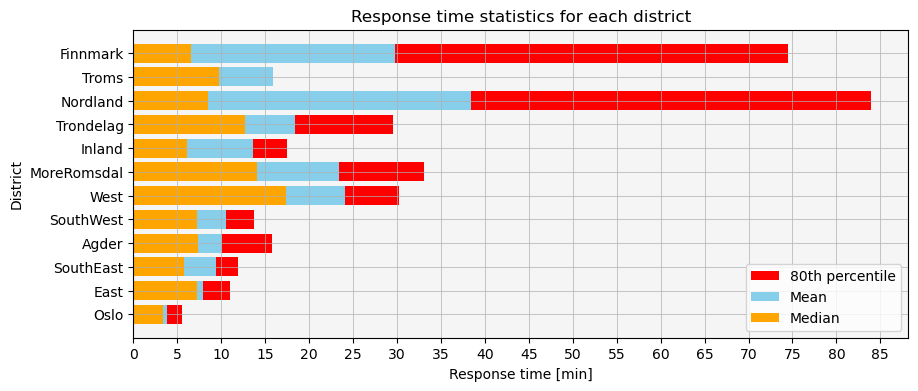

In [7]:
# Bar plot of main statistics for each district
utilityModule.plot_horizontal_barplot_all_districts(district_stats_summary, figsize=(10, 4))

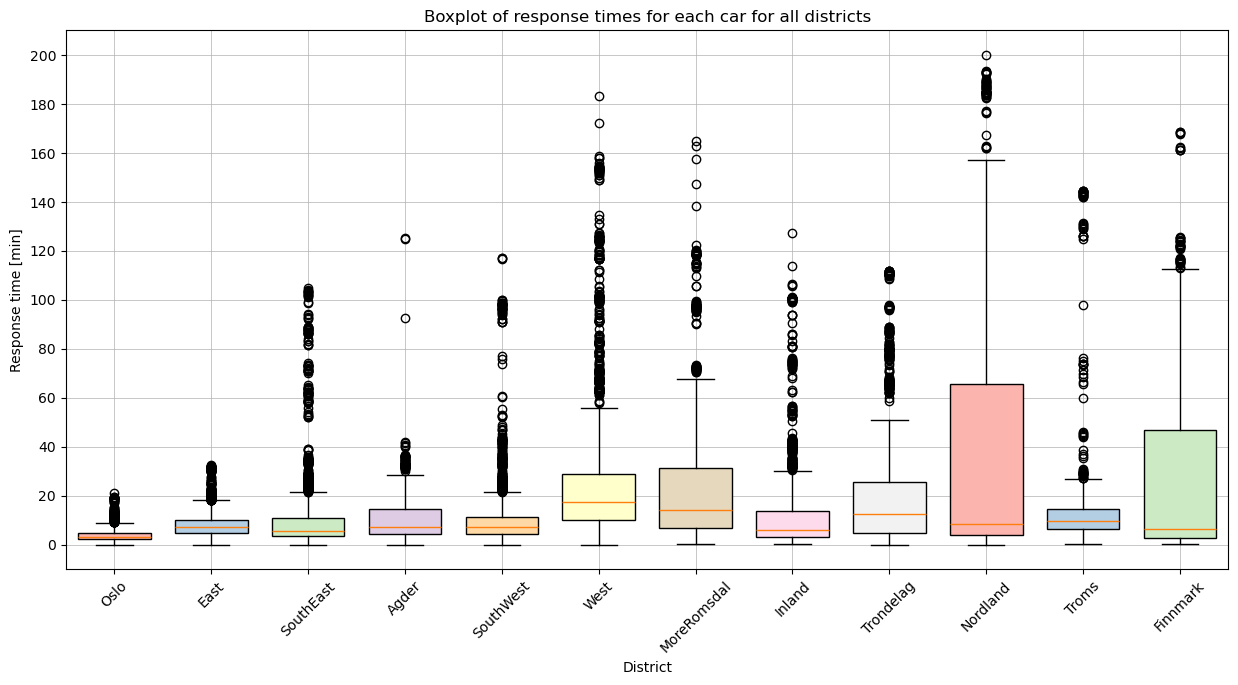

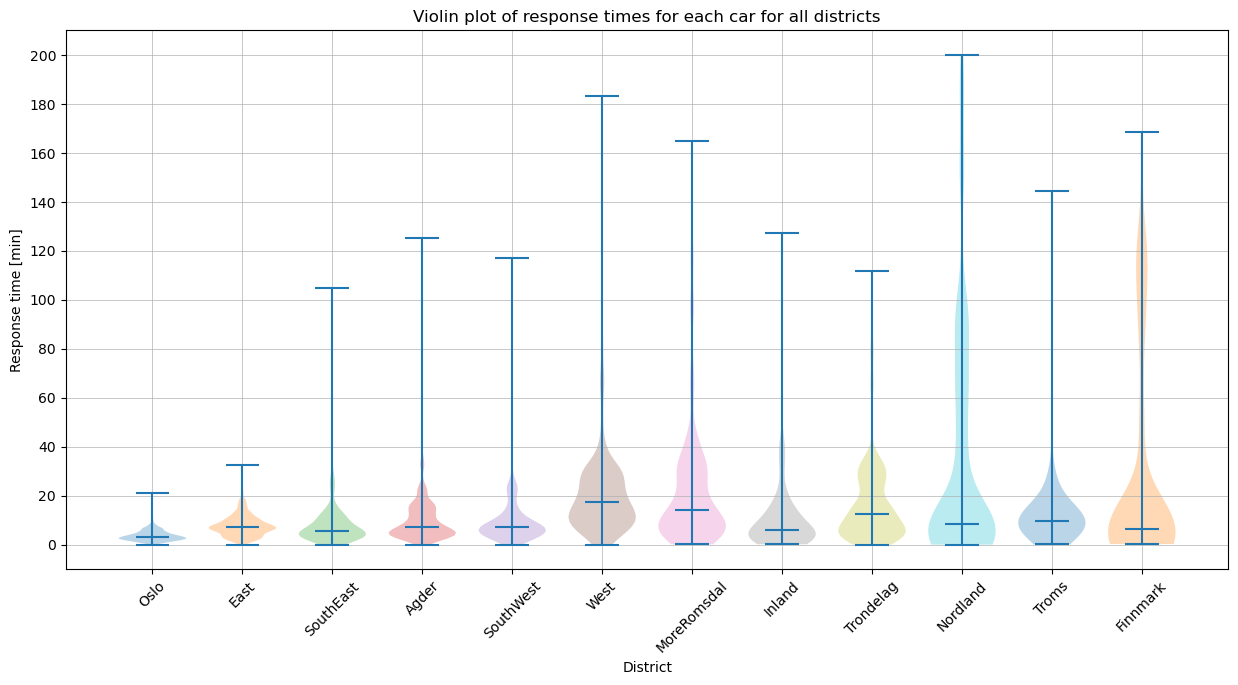

In [8]:
# Boxplot and violin plot of travel times for each district
utilityModule.plot_travel_time_boxplot_all_districts(car_to_events_dict, figsize=(15, 7))
utilityModule.plot_travel_time_violinplot_all_districts(car_to_events_dict, figsize=(15, 7))

## 3) Visualize single district statistics

Using Nordland district as an analysis example.

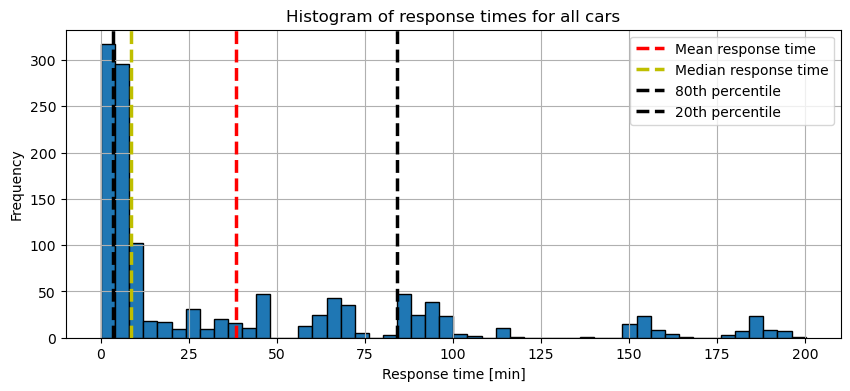

In [9]:
# Histogram - single district
utilityModule.plot_travel_time_histogram_district(car_to_events_dict['Nordland'], district_wide_stats_dict['Nordland'], figsize=(10, 4))

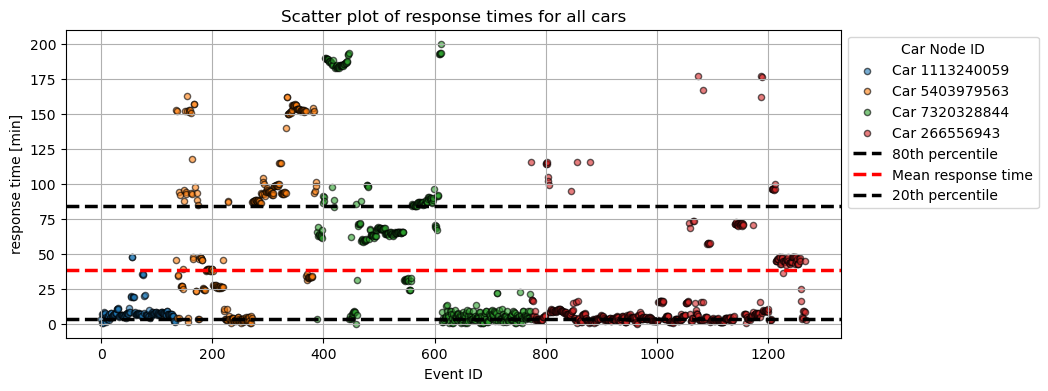

In [10]:
# Scatterplot - single district
utilityModule.plot_travel_time_scatterplot_district(car_to_events_dict['Nordland'], district_wide_stats_dict['Nordland'], figsize=(10, 4))

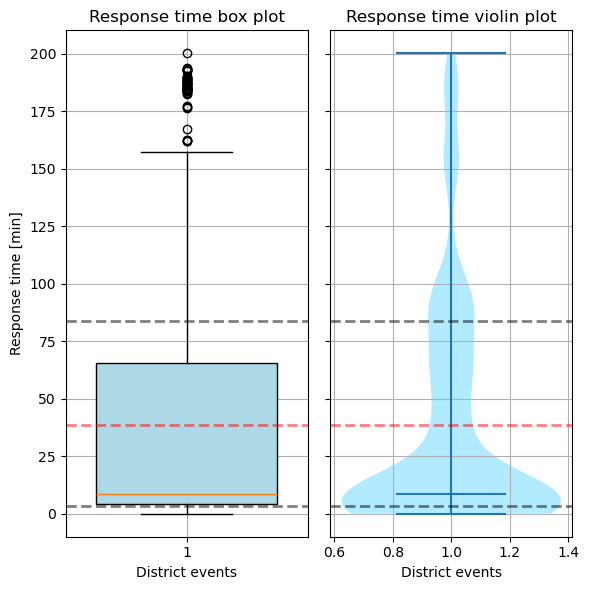

In [11]:
# Boxplot and violin plot - single district
utilityModule.plot_travel_time_box_violin_district(car_to_events_dict['Nordland'], district_wide_stats_dict['Nordland'], figsize=(6,6))

## 4) Visualize within-district statistics for individual cars

Using Nordland district as an analysis example.

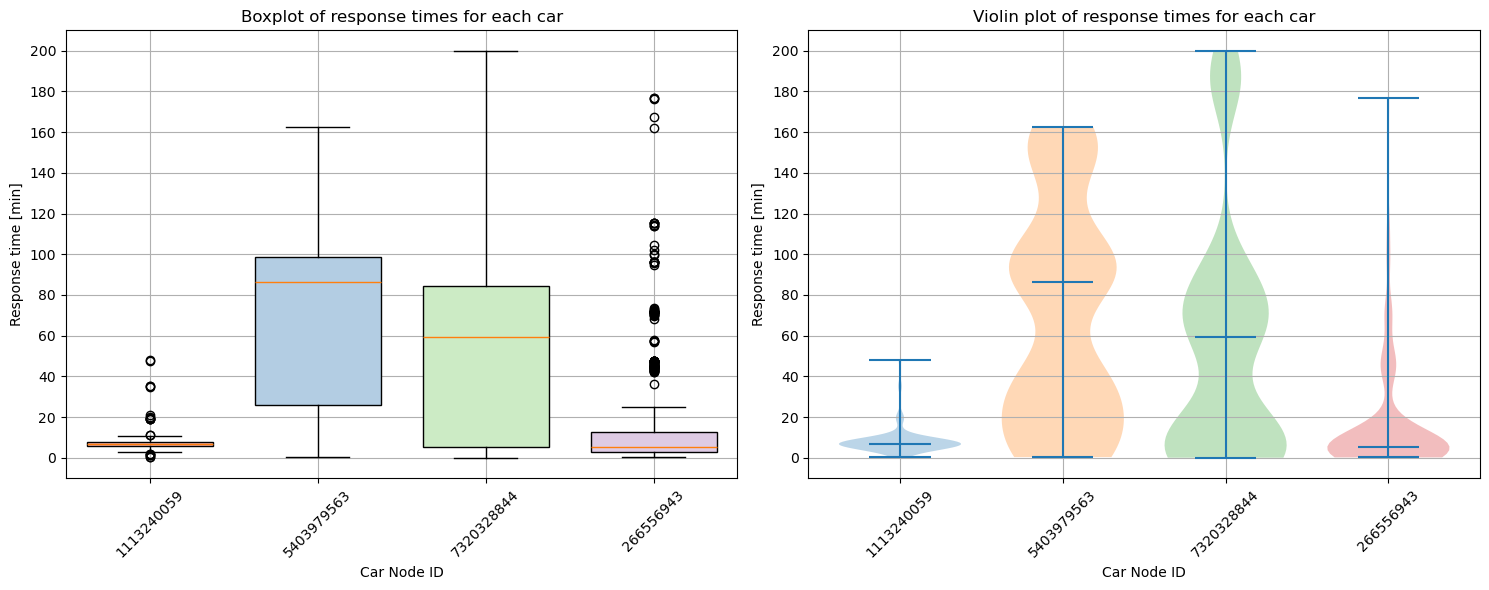

In [12]:
# Boxplot and Violinplot - single district, all cars
utilityModule.plot_travel_time_box_violin_cars(car_to_events_dict['Nordland'], y_axis_granularity=20, figsize=(15,6))